In [56]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py
#dir_model= '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/measurements/FSS_tfs/spice/'
dir_measurements = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/measurements/FSS_tfs/10_16_2020_vary_gain_settings/'
dir_meas2 = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/measurements/FSS_tfs/10_14_2020/tpfm/'
dir_meas3 = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/measurements/FSS_tfs/10_21_2020/'
plt.style.use('/Users/daniel_vander-hyde/Documents/git/my_python/matplotlib/stylelib/pptsize')
import sdfascii as sdf

In [46]:
#Importing measurement and model data
num_set = np.array([0,1,2,3])
file_prefix_LG = ["" for x in range(4)]
file_prefix_TG = ["" for x in range(4)]
dat_meas_db_LG = [[] for x in range(4)]
dat_meas_deg_LG = [[] for x in range(4)]
dat_meas_db_TG = [[] for x in range(4)]
dat_meas_deg_TG = [[] for x in range(4)]
Laser_gain = 'LG'
Total_gain = 'TG'
for i in np.arange(0,4,1): 
    file_prefix_LG[i] = Laser_gain + str(num_set[0]) + Total_gain + str(num_set[i])
    file_prefix_TG[i] = Laser_gain + str(num_set[i]) + Total_gain + str(num_set[0])
    dat_meas_db_LG[i] = np.loadtxt(dir_measurements + 'DB_' + file_prefix_LG[i] + '.TXT')
    dat_meas_db_TG[i] = np.loadtxt(dir_measurements + 'DB_' + file_prefix_TG[i] + '.TXT')
    dat_meas_deg_LG[i] = np.loadtxt(dir_measurements + 'DEG_' + file_prefix_LG[i] + '.TXT')
    dat_meas_deg_TG[i] = np.loadtxt(dir_measurements + 'DEG_' + file_prefix_TG[i] + '.TXT')
off_rack_db = np.loadtxt(dir_meas2 + 'db' + '.TXT')
off_rack_deg = np.loadtxt(dir_meas2 + 'deg' + '.TXT')

In [58]:
db_final = sdf.read_ascii_files(dir_meas3 + 'DB')
deg_final = sdf.read_ascii_files(dir_meas3 + 'DEG')

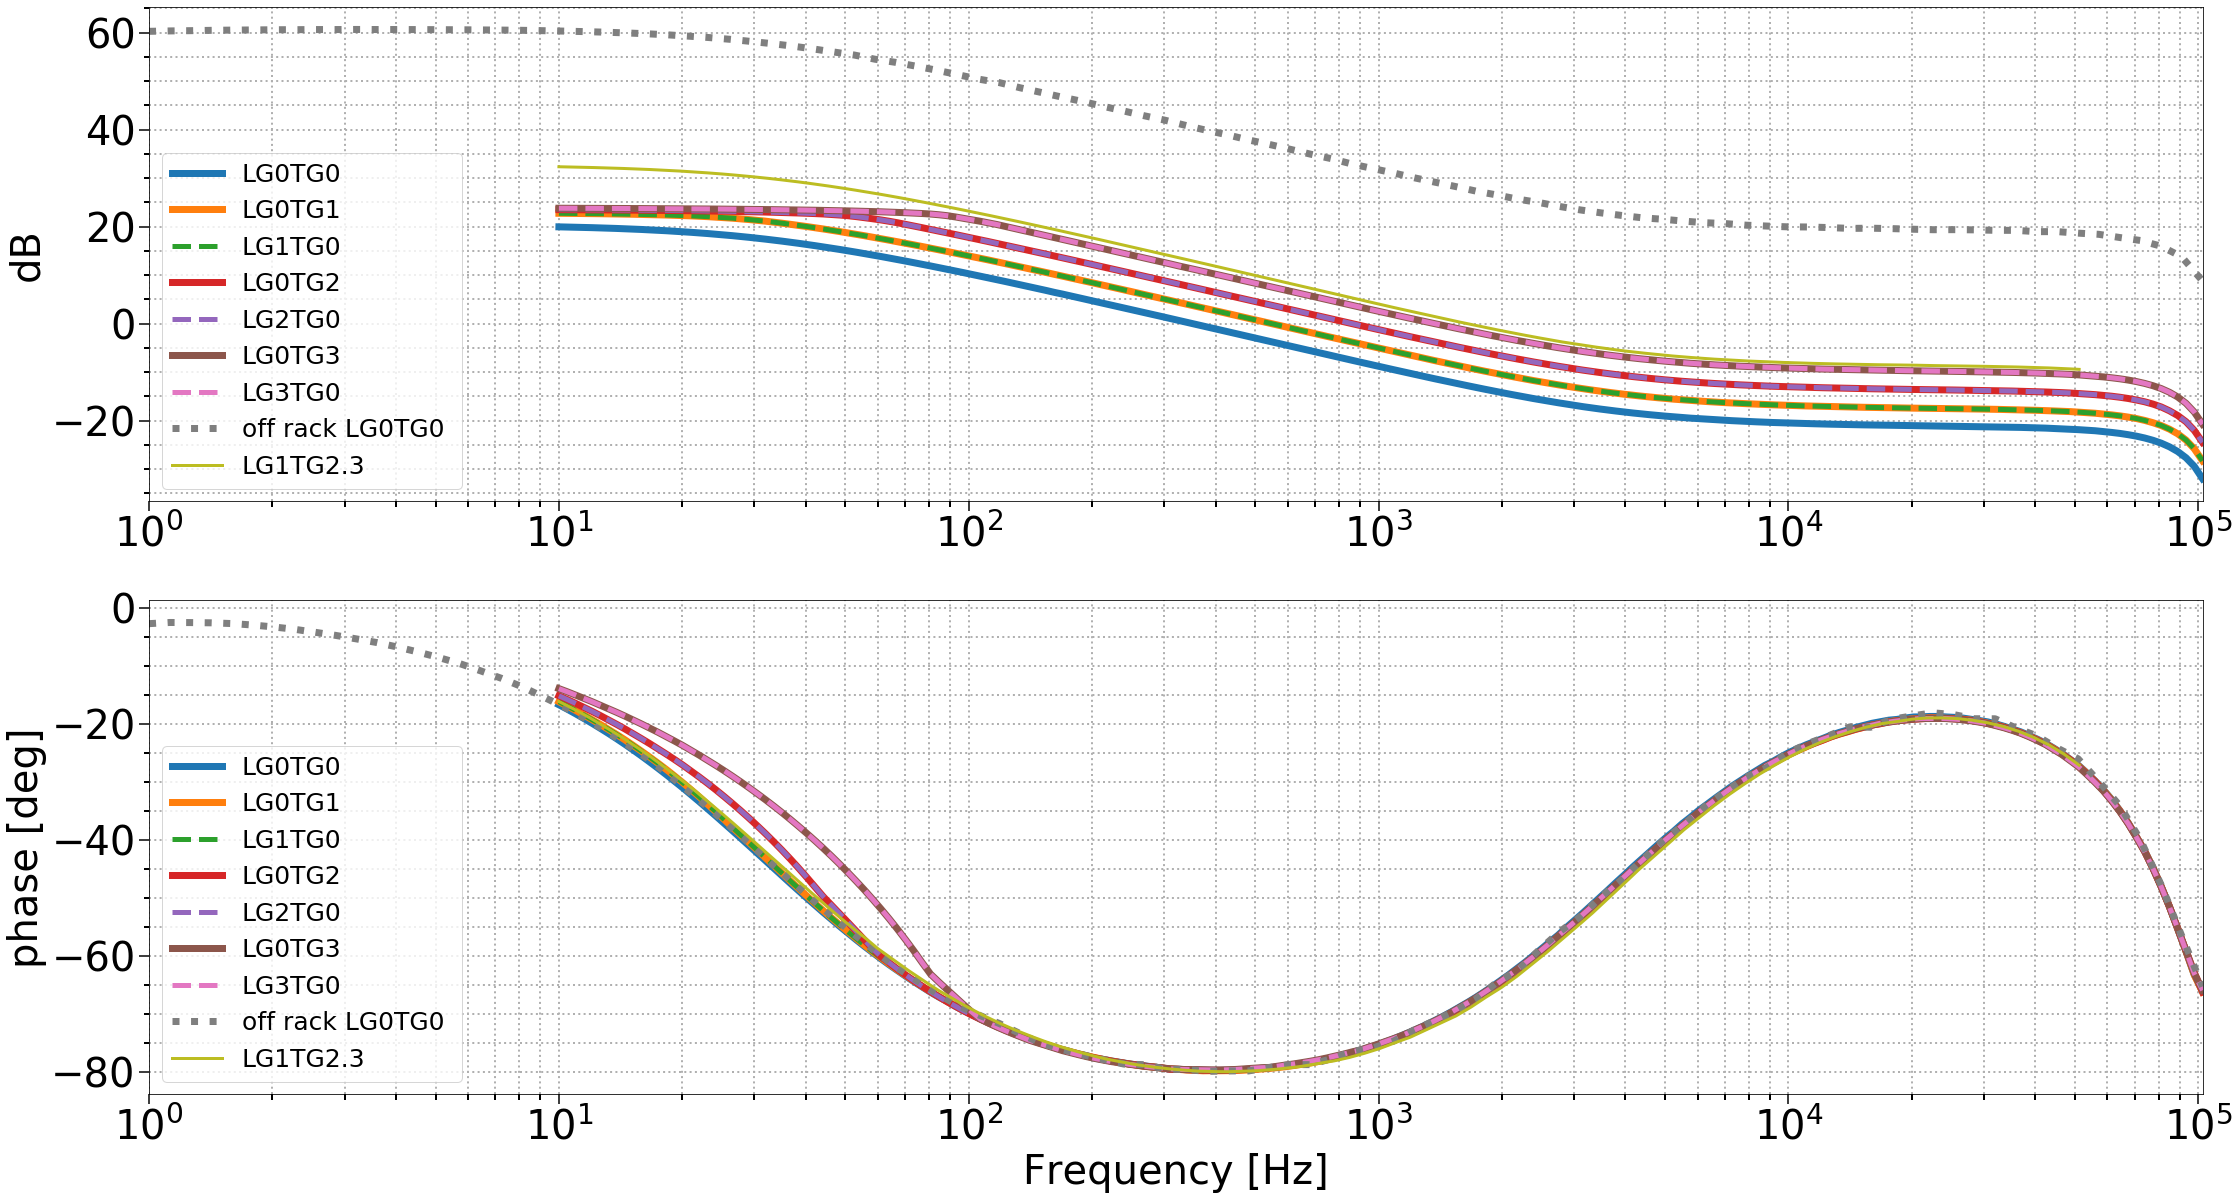

In [63]:
plt.subplot(211)
for i in range(4):
    plt.semilogx(dat_meas_db_LG[i][:,0],dat_meas_db_LG[i][:,1],linewidth=7, label = file_prefix_LG[i])
    if i > 0: 
        plt.semilogx(dat_meas_db_TG[i][:,0],dat_meas_db_LG[i][:,1],'--',linewidth=5, label = file_prefix_TG[i])
plt.semilogx(off_rack_db[:,0],off_rack_db[:,1],':',linewidth=7, label = 'off rack LG0TG0 ')
plt.semilogx(db_final.frequency[:], db_final.amplitude[:], label='LG1TG2.3')
plt.xlim(off_rack_db[0,0], off_rack_db[-1,0])
plt.ylabel('dB')
plt.legend(prop={'size': 25})
plt.subplot(212)
for i in range(4):
    plt.semilogx(dat_meas_deg_LG[i][:,0],dat_meas_deg_LG[i][:,1], linewidth=7, label = file_prefix_LG[i])
    if i > 0: 
        plt.semilogx(dat_meas_deg_TG[i][:,0],dat_meas_deg_LG[i][:,1],'--', linewidth=5, label = file_prefix_TG[i])
plt.semilogx(off_rack_deg[:,0],off_rack_deg[:,1],':',linewidth=7, label = 'off rack LG0TG0 ')
plt.semilogx(deg_final.frequency[:], deg_final.amplitude[:], label='LG1TG2.3')
plt.xlim(off_rack_deg[0,0], off_rack_deg[-1,0])
#plt.xlim(dat_meas_deg_LG[0][0,0], dat_meas_deg_LG[0][-1,0])
plt.legend(prop={'size': 25})
plt.xlabel('Frequency [Hz]')
plt.ylabel('phase [deg]')
plt.savefig('/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/updates/FSS_LG_TG.png', dpi=300,bbox_inches='tight')